In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm


from pygraphon.graphons.common_graphon_functions import graphon_log
from pygraphon.utils.utils_graph import edge_density
from pygraphon.graphons.StepGraphon import StepGraphon
from pygraphon.plots.plot_matrices import spy

from pygraphon.estimators import *
from pygraphon.norm import MseProbaEdge

In [20]:
from pygraphon.plots import plot as plot_step_graphon
def fit_and_show(estimator,A):
	print(estimator.__class__.__name__)
	estimator.fit(A)
    
	#fig, ax = plt.subplots(1, 2, figsize=(10, 5))
	#fig.subplots_adjust(right=0.9)
	#cbar_ax = fig.add_axes([0.95, 0.15, 0.05, 0.7])
	
	plt.imshow(estimator.get_edge_connectivity(), cmap='jet')
	plt.colorbar()
	plt.show()
	plot_step_graphon(estimator.get_graphon(), colormap="jet", show_colorbar=True, integrate_to_1=False)
	plt.show()

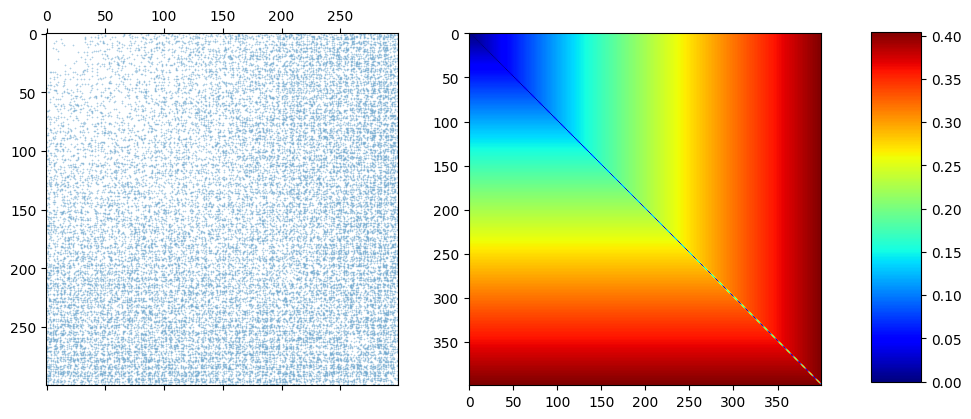

In [4]:
#Set the matrix of theta
graphon_matrix = np.array([[0.6,0.2,0.2],[0.2,0.6,0.2],[0.2,0.2,0.7]])
#set up normalised graphon with graphon
graphon = StepGraphon(graphon_matrix,1/3)
graphon = graphon_log

A = graphon.draw(rho = 1,n = 300, exchangeable=False)
norm = MseProbaEdge(n_nodes = 500)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
fig.subplots_adjust(right=0.9)
cbar_ax = fig.add_axes([0.95, 0.15, 0.05, 0.7])
im = ax[1].imshow(graphon._get_edge_probabilities(400,False,True), cmap='jet')
_ = spy(A, ax=ax[0])
plt.colorbar(im, cax=cbar_ax)
plt.show()

HistogramEstimator


Log likelihood: -1.9893:   1%|          | 5/500 [00:02<03:38,  2.27it/s]


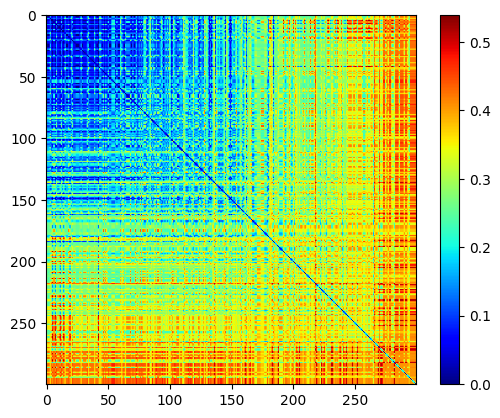

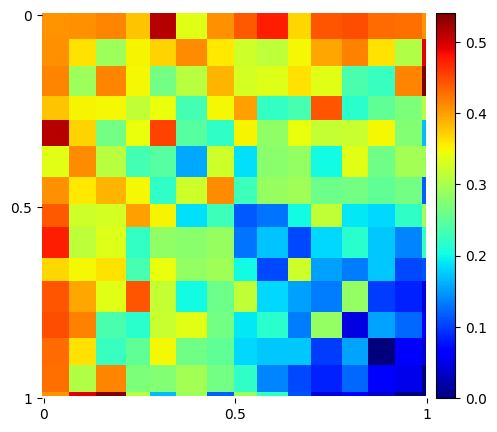

SAS


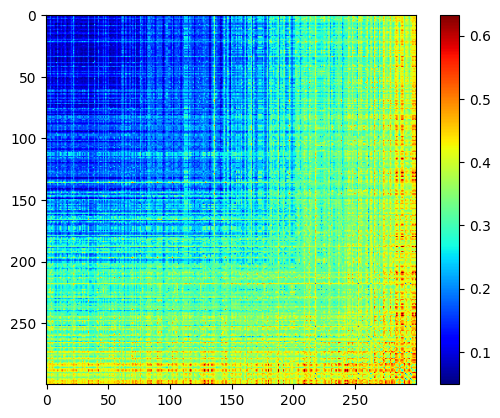

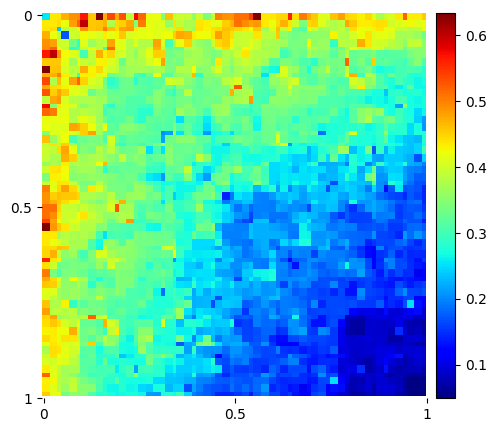

USVT


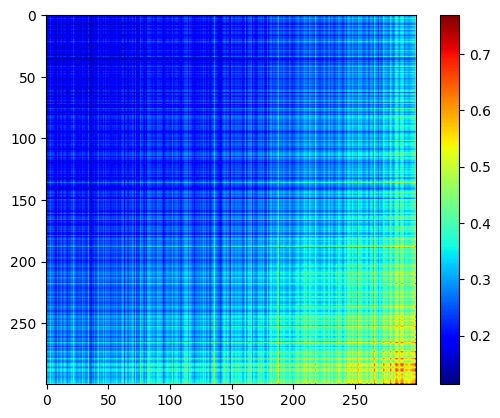

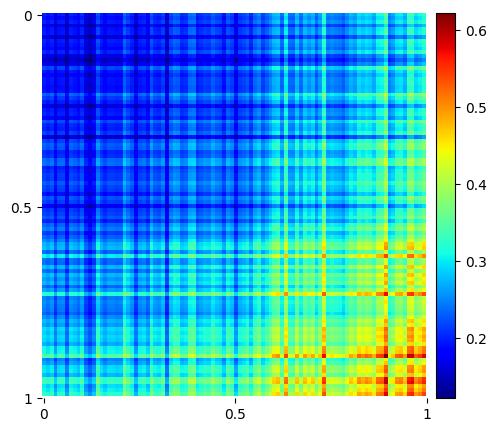

In [22]:
fit_and_show(HistogramEstimator(),A)
fit_and_show(SAS(),A)
fit_and_show(USVT(),A)
#

LG


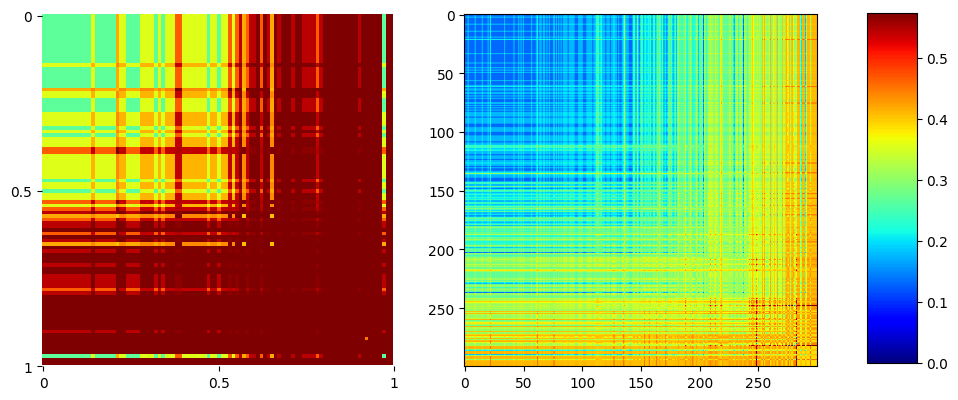

NBDsmooth


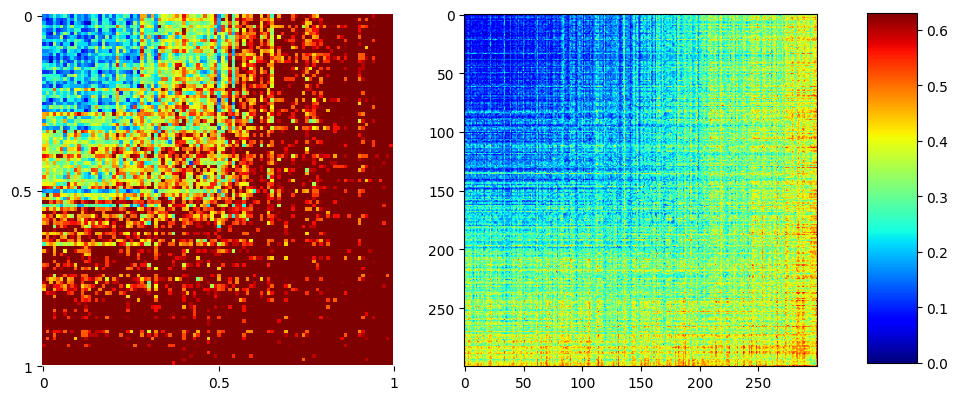

In [6]:
fit_and_show(LG(K=10),A)
fit_and_show(NBDsmooth(),A)

Completion


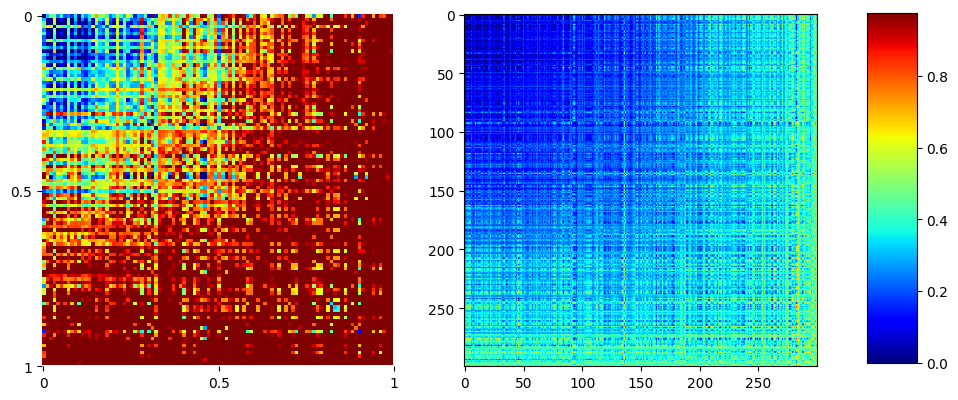

In [7]:
fit_and_show(Completion(iternumber=20),A)